# Modernisme: Accés Obert. Hack the Data!

Dades scrapejades per professors de la facultat de història (UB raval). 

[GracmoDocs](http://www.ub.edu/gracmon/?page_id=9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
pintura_df = pd.read_csv('pintura.csv', sep=';', encoding='latin1')

    # recodificar dades 
    
    import codecs
    import csv
    
    f = open('dades/pintura.csv', 'rb')
    
    def reencode(f):
        for line in f:
            yield line.decode('windows-1250').encode('utf-8')
    
            
    for i in reencode(f):
        print i

In [26]:
pintura_df.head()

,Nid,Títol,Tipus,Autor,Num. Inventari,Alçada,Amplada,Col·lecció,Inici,Imatge,...,Carrer,Codi catrleg,Coordenades,Diócesis,Estatus,Gcnere,Material utilitzat,Part de,Població,Wikilink
0,1792,Bust de nena,Pintura,Joan Brull i Vinyoles,1686,412,318,Biblioteca Museu Víctor Balaguer,1912-01-01T00:00:00Z,http://commons.wikimedia.org/wiki/Special:File...,...,NaN,NaN,1.729429999 41.6221353,NaN,NaN,retrat,NaN,NaN,NaN,http://www.wikidata.org/entity/Q19162526
1,2248,La Vídua,Pintura,Ramon Casas i Carbó,2083,NaN,NaN,Biblioteca Museu Víctor Balaguer,1890,https://upload.wikimedia.org/wikipedia/commons...,...,NaN,NaN,1.729429999 41.6221353,NaN,NaN,NaN,NaN,NaN,NaN,https://www.wikidata.org/wiki/Q18719543
2,2251,Montmartre (Ramon Casas),Pintura,Ramon Casas i Carbó,1651,NaN,NaN,Biblioteca Museu Víctor Balaguer,1899,https://upload.wikimedia.org/wikipedia/commons...,...,NaN,NaN,1.729429999 41.6221353,NaN,NaN,paisatge,NaN,NaN,NaN,https://www.wikidata.org/wiki/Q11937478
3,1804,Cap de nena,Pintura,Laurer Barrau i Bunol,126,40,30,Casa Masó,1900-01-01T00:00:00Z,http://commons.wikimedia.org/wiki/Special:File...,...,NaN,NaN,2.824789699 41.9860456,NaN,NaN,retrat,NaN,NaN,NaN,http://www.wikidata.org/entity/Q23015840
4,1820,Carrer,Pintura,annnim,48,30,22,Casa Masó,1870-01-01T00:00:00Z,http://commons.wikimedia.org/wiki/Special:File...,...,NaN,NaN,2.824789699 41.9860456,NaN,NaN,paisatge,NaN,NaN,NaN,http://www.wikidata.org/entity/Q23015831


In [9]:
dim_df = pd.DataFrame()

In [10]:
dim_df[['height', 'width']] =  pintura_df.ix[:,5:7]

In [11]:
dim_df['any'] = pintura_df.Inici

In [14]:
dim_df.isnull().sum()

height    973
width     973
any        10
dtype: int64

In [15]:
len(dim_df)

1461

In [17]:
len(dim_df.dropna())

487

In [19]:
dim_df = dim_df.dropna()

In [27]:
dim_df.height = pd.to_numeric(dim_df.height, errors='coerce')
dim_df.width  = pd.to_numeric(dim_df.width, errors='coerce')

C:\Users\Biel\Anaconda2\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
dim_df = dim_df.dropna()

In [33]:
dim_df['ratio'] = dim_df.height/dim_df.width

C:\Users\Biel\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


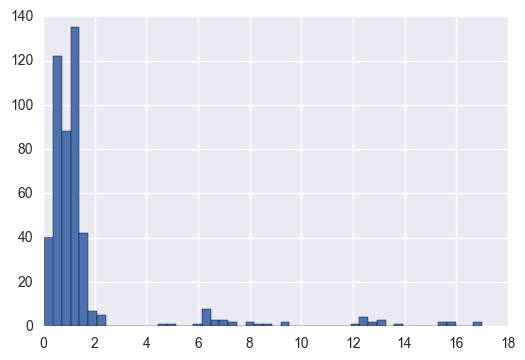

In [38]:
dim_df.ratio.hist(bins=50)